# Task 3: Linear Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "Housing.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features (X) and target (y)
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(970043.4039201636, 1754318687330.6638, 0.6529242642153184)

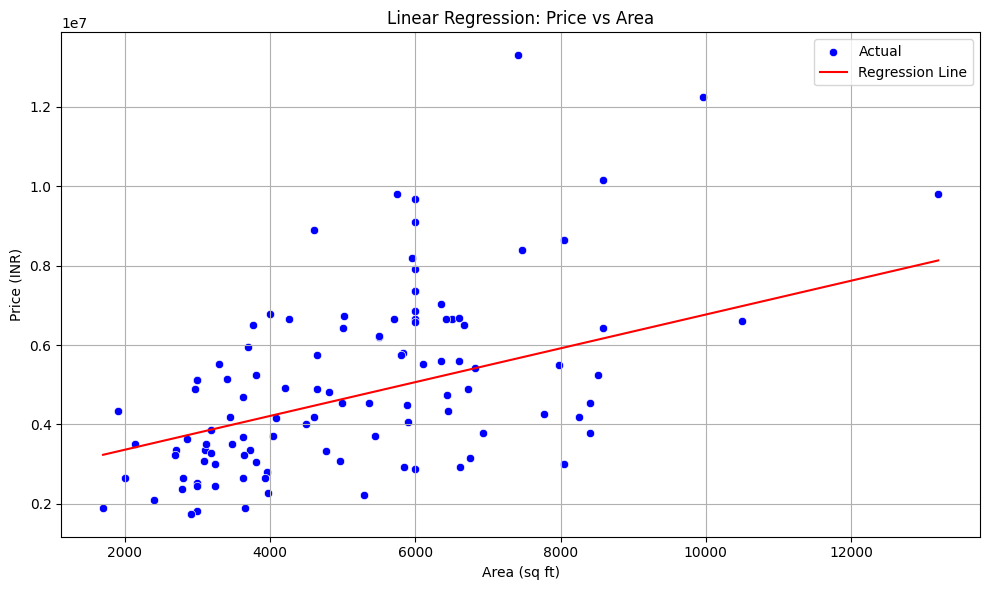

(np.float64(425.72984193878284), np.float64(2512254.2639593435))

In [5]:
# Create a simple model using only the 'area' feature to visualize the regression line
X_area = df[["area"]]
y_price = df["price"]

# Train-test split
X_area_train, X_area_test, y_area_train, y_area_test = train_test_split(X_area, y_price, test_size=0.2, random_state=42)

# Train the model
model_area = LinearRegression()
model_area.fit(X_area_train, y_area_train)

# Predict for plotting
y_area_pred = model_area.predict(X_area_test)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_area_test["area"], y=y_area_test, color="blue", label="Actual")
sns.lineplot(x=X_area_test["area"], y=y_area_pred, color="red", label="Regression Line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (INR)")
plt.title("Linear Regression: Price vs Area")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Coefficient interpretation
coef = model_area.coef_[0]
intercept = model_area.intercept_

coef, intercept